In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data
data = pd.DataFrame(
    {
        'rooms': [5.2, 4.5, 5.4, 6, 6.5],
        'value': [9.8, 7.3, 13.3, 16.8, 24]
    }
)
data

,rooms,value
0,5.2,9.8
1,4.5,7.3
2,5.4,13.3
3,6.0,16.8
4,6.5,24.0


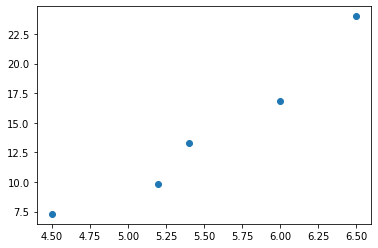

In [ ]:
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

# Exercício a Mão

In [ ]:
import seaborn as sns
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

In [ ]:
X_mean = np.mean(X)
Y_mean = np.mean(Y)

# Método dos Mínimos Quadrados
m = sum((X - X_mean) * (Y - Y_mean)) / sum((X - X_mean) ** 2)
c = Y_mean - m * X_mean

print(f'slope: {m}, intercept: {c}')

slope: 8.264906303236797, intercept: -31.38228279386712


In [ ]:
def gerar_grafico(theta_0 = -31.36, theta_1 = 8.26, title = 'Regressão linear - Método dos Mínimos Quadrados'):
  df = pd.DataFrame()
  df['x'] = [np.min(X), np.max(X)]
  df['y'] = [(theta_1*np.min(X) + theta_0), theta_1*np.max(X) + theta_0]
  
  sns.lineplot(x='x', y='y', data=df, color='red')
  plt.scatter(X, Y)

  plt.title(title)
  plt.ylabel('Valor médio em U$1,000')
  plt.xlabel('Média de quartos por casa')

  plt.show()

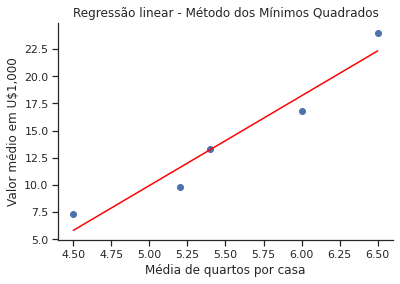

In [ ]:
gerar_grafico()

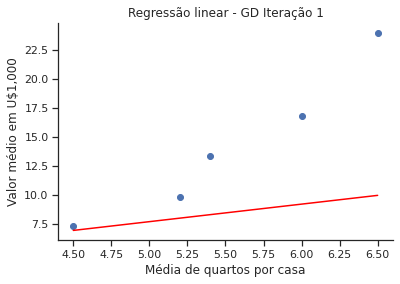

In [ ]:
gerar_grafico(0.0872, 1.51546, 'Regressão linear - GD Iteração 1')

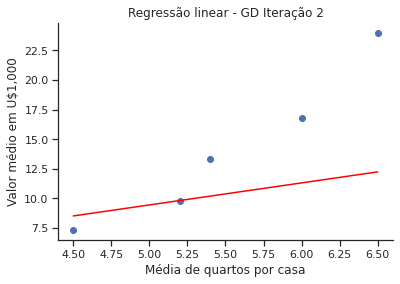

In [ ]:
gerar_grafico(0.14506, 1.86158, 'Regressão linear - GD Iteração 2')

In [ ]:
# Gradiente Descendente
learning_rate = 0.01
epochs = 2
n = len(X)

theta_0 = 0
theta_1 = 1

for i in range(epochs):
  Y_pred = theta_1*X + theta_0
  theta_0 = theta_0 - (learning_rate * ((1/n)*np.sum(Y_pred - Y)))
  theta_1 = theta_1 - (learning_rate * ((1/n)*np.sum((Y_pred - Y) * X)))

print(theta_0, theta_1)

0.14507460800000002 1.8666232360000001


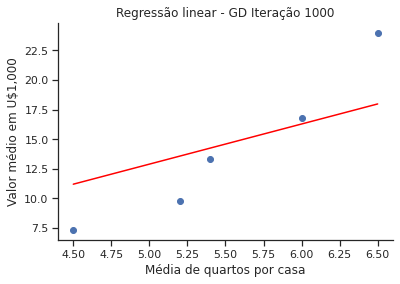

In [ ]:
gerar_grafico(-4.05, 3.39, 'Regressão linear - GD Iteração 1000')

In [ ]:
RSS = []

m = 8.264906303236797
c = [x for x in range(-32, 7)]

for intercept in c:
  Y_pred = m*X + intercept
  sum_residuals = sum((Y - Y_pred) ** 2)
  RSS.append(sum_residuals)

for i in range(len(X)):
  print(f'-2({Y[i]} - (intercept + 8.26 * {X[i]}) +')

#RSS

-2(9.8 - (intercept + 8.26 * 5.2) +
-2(7.3 - (intercept + 8.26 * 4.5) +
-2(13.3 - (intercept + 8.26 * 5.4) +
-2(16.8 - (intercept + 8.26 * 6.0) +
-2(24.0 - (intercept + 8.26 * 6.5) +


In [ ]:
RSS

[12.091101013149762,
 10.913928951820962,
 19.736756890492156,
 38.559584829163356,
 67.38241276783455,
 106.20524070650575,
 155.02806864517694,
 213.85089658384817,
 282.6737245225193,
 361.49655246119056,
 450.31938039986176,
 549.1422083385329,
 657.965036277204,
 776.7878642158753,
 905.6106921545464,
 1044.4335200932178,
 1193.2563480318888,
 1352.0791759705598,
 1520.902003909231,
 1699.7248318479024,
 1888.5476597865736,
 2087.370487725245,
 2296.193315663916,
 2515.0161436025874,
 2743.8389715412586,
 2982.6617994799294,
 3231.4846274186007,
 3490.3074553572724,
 3759.130283295943,
 4037.953111234614,
 4326.775939173285,
 4625.5987671119565,
 4934.421595050629,
 5253.244422989299,
 5582.067250927971,
 5920.8900788666415,
 6269.712906805313,
 6628.535734743984,
 6997.358562682656]

In [ ]:
for i in range(len(X)):
  print(f'-2({Y[i]} - ({intercept} + 8.26 * {X[i]}) +')

step_size = 1
learning_rate = 0.01
intercept = 0
slope = 8.26

while step_size >= 0.001:
  slope_curve_func = sum( -2*(Y - (intercept + slope * X)) )
  #print(f'Derivada da curva: {slope_curve_func}')

  step_size = slope_curve_func * learning_rate # para quando estiver perto de 0
  intercept = intercept - step_size

  #print(f'step size: {step_size}')
  #print(f'new intercept: {intercept}')
  #print()
intercept

-2(9.8 - (-31.346742825112383 + 8.26 * 5.2) +
-2(7.3 - (-31.346742825112383 + 8.26 * 4.5) +
-2(13.3 - (-31.346742825112383 + 8.26 * 5.4) +
-2(16.8 - (-31.346742825112383 + 8.26 * 6.0) +
-2(24.0 - (-31.346742825112383 + 8.26 * 6.5) +


-31.346742825112383

# Modelos

In [ ]:
# Building the model
m = 1
c = 0

L = 0.01  # The learning Rate
epochs = 2  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs):
#while (D_m <= -0.001 or D_m >= 0.001) or (D_c <= -0.001 or D_c >= 0.001):
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    #mse = (1/n) * sum((X * (Y - Y_pred)) ** 2)
    #print(f'm: {m}, mse: {mse}')
    
print(m, c)

2.404652944 0.23149843200000003


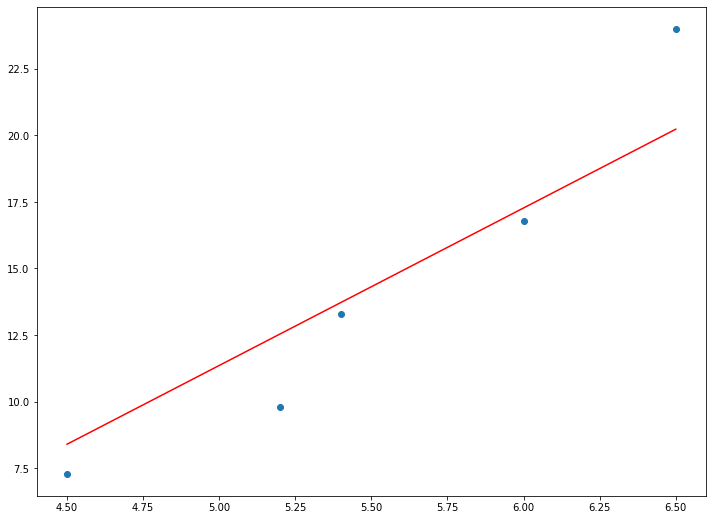

In [ ]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

In [ ]:
# Building the model
X_mean = np.mean(X)
Y_mean = np.mean(Y)

num = 0
den = 0
for i in range(len(X)):
    num += (X[i] - X_mean)*(Y[i] - Y_mean)
    den += (X[i] - X_mean)**2
m = num / den
c = Y_mean - m*X_mean

print (m, c)

8.264906303236797 -31.38228279386712


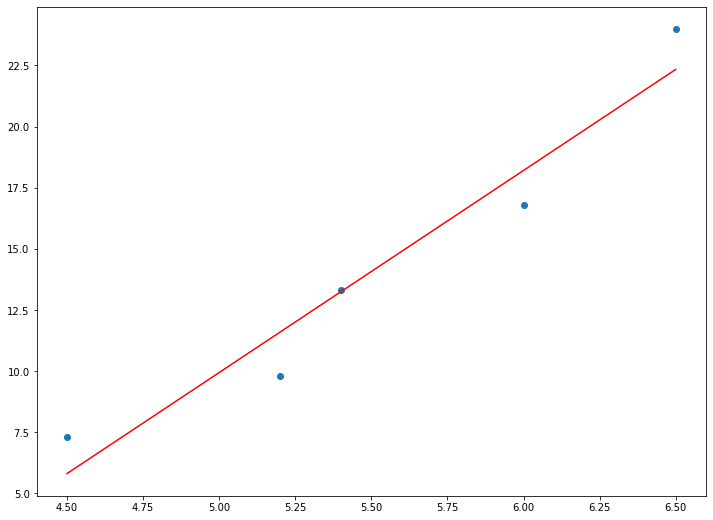

In [ ]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) # actual
# plt.scatter(X, Y_pred, color='red')
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

In [ ]:
def linear_regression(X, y, m_current=0, b_current=0, epochs=1000, learning_rate=0.0001):
     N = float(len(y))
     for i in range(epochs):
          y_current = (m_current * X) + b_current
          cost = sum([data**2 for data in (y-y_current)]) / N
          m_gradient = -(1/N) * sum(X * (y - y_current))
          b_gradient = -(1/N) * sum(y - y_current)
          m_current = m_current - (learning_rate * m_gradient)
          b_current = b_current - (learning_rate * b_gradient)
     return m_current, b_current, cost

In [ ]:
linear_regression(X, Y, m_current=1, b_current=0, epochs=1, learning_rate=0.01)

(1.51546, 0.08720000000000001, 102.85999999999999)

In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

In [ ]:
X = np.array(X).reshape(-1, 1)
X

array([[5.2],
       [4.5],
       [5.4],
       [6. ],
       [6.5]])

In [ ]:
Y = np.array(Y).reshape(-1, 1)
Y

array([[ 9.8],
       [ 7.3],
       [13.3],
       [16.8],
       [24. ]])

In [ ]:
linear_reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
linear_reg.score(X, Y)

0.9402995316969567

In [ ]:
linear_reg.coef_

array([[8.2649063]])

In [ ]:
linear_reg.intercept_

array([-31.38228279])